In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [5]:
file = pd.read_csv('hour.csv', sep =',')

In [8]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [10]:
file.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [15]:
print(file['hr'].unique())

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


In [18]:
file['fecha'] = pd.to_datetime(file.dteday) + pd.to_timedelta(file.hr, unit = 'h')

In [20]:
file.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,fecha
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,2011-01-01 00:00:00
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,2011-01-01 01:00:00
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,2011-01-01 02:00:00
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,2011-01-01 03:00:00
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,2011-01-01 04:00:00


In [25]:
file.drop(columns=['instant', 'dteday', 'yr', 'mnth', 'hr'], inplace=True)

In [27]:
file.head()

,season,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,fecha
0,1,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,2011-01-01 00:00:00
1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,2011-01-01 01:00:00
2,1,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,2011-01-01 02:00:00
3,1,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,2011-01-01 03:00:00
4,1,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,2011-01-01 04:00:00


In [30]:
file_filtered = file[['fecha', 'cnt']]

In [33]:
file_filtered.head()

,fecha,cnt
0,2011-01-01 00:00:00,16
1,2011-01-01 01:00:00,40
2,2011-01-01 02:00:00,32
3,2011-01-01 03:00:00,13
4,2011-01-01 04:00:00,1


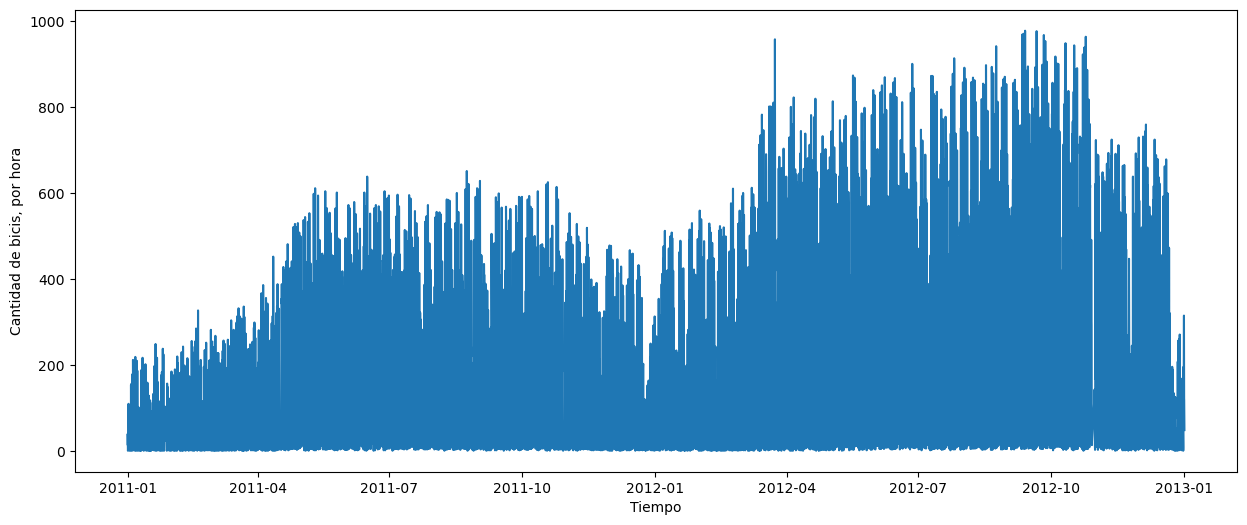

In [36]:
plt.figure(figsize = (15,6))
plt.plot(file.fecha, file.cnt)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de bicis, por hora')
plt.show()

In [44]:
diario = file_filtered.resample('D', on = 'fecha').sum()
print(diario.shape)
diario.head()

(731, 1)


,cnt
fecha,
2011-01-01,985
2011-01-02,801
2011-01-03,1349
2011-01-04,1562
2011-01-05,1600


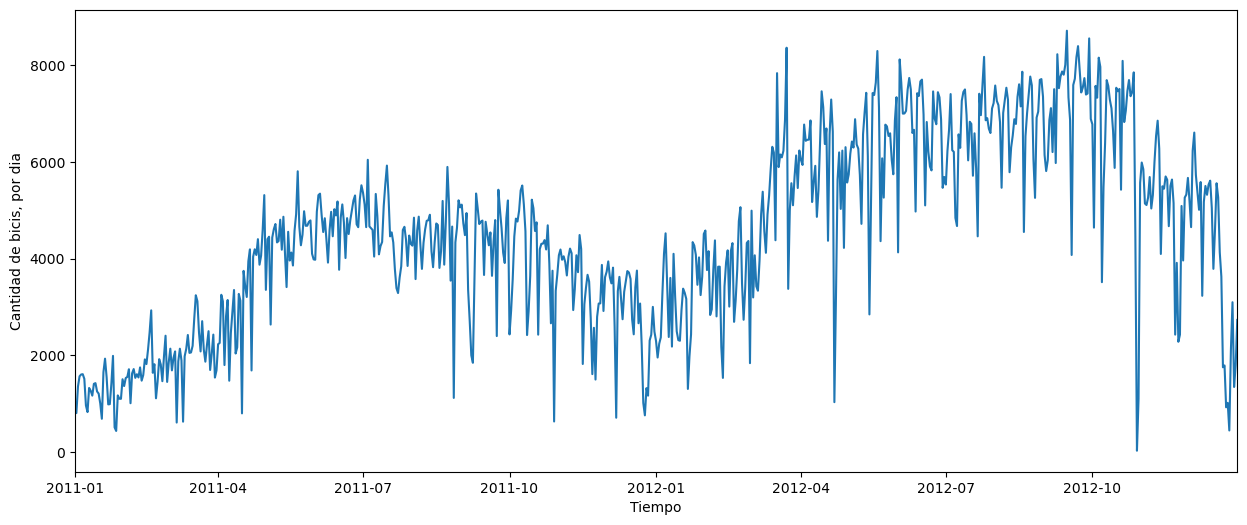

In [48]:
plt.figure(figsize = (15,6))
plt.plot(diario.index, diario.cnt)
plt.xlim(datetime.date(2011,1,1), datetime.date(2012,12,31))
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de bicis, por dia')
plt.show()

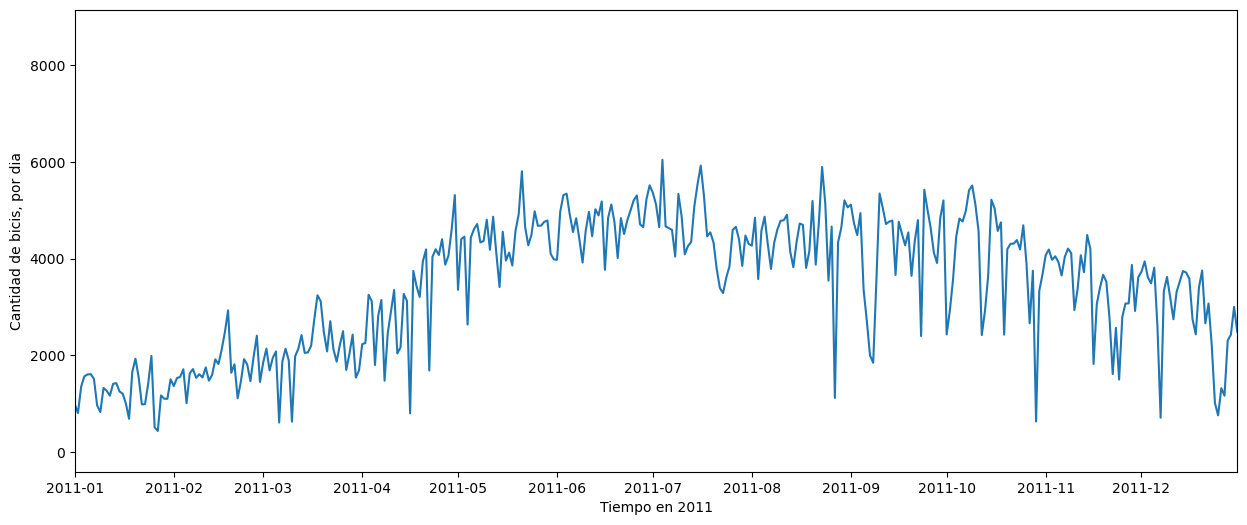

In [54]:
plt.figure(figsize = (15,6))
plt.plot(diario.index, diario.cnt)
plt.xlim(datetime.date(2011,1,1), datetime.date(2011,12,31))
plt.xlabel('Tiempo en 2011')
plt.ylabel('Cantidad de bicis, por dia')
plt.show()

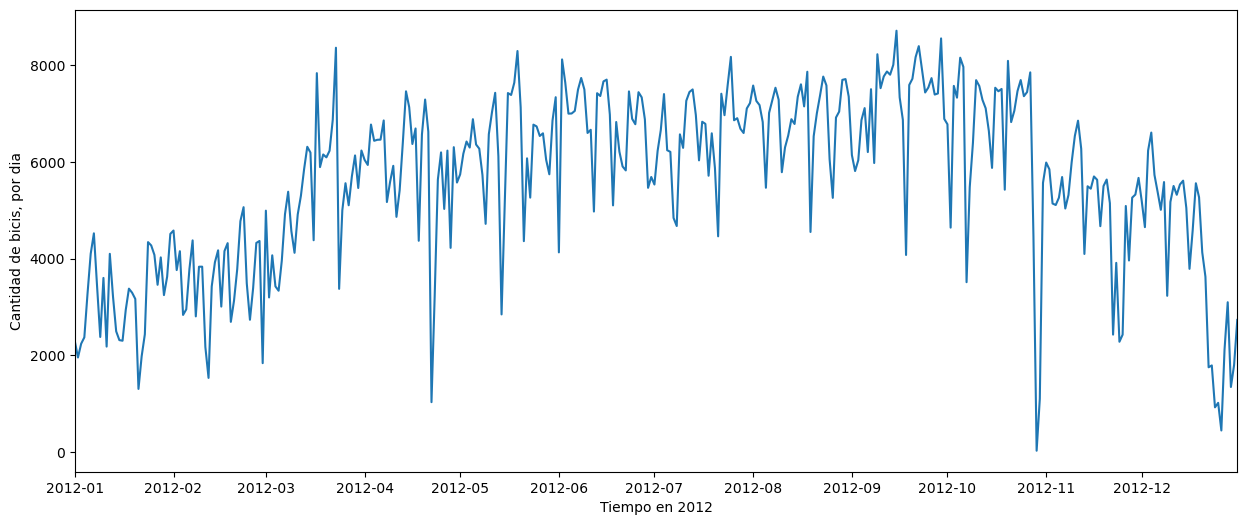

In [56]:
plt.figure(figsize = (15,6))
plt.plot(diario.index, diario.cnt)
plt.xlim(datetime.date(2012,1,1), datetime.date(2012,12,31))
plt.xlabel('Tiempo en 2012')
plt.ylabel('Cantidad de bicis, por dia')
plt.show()

In [ ]:
#vemos que en ambos años los rentals de las bicis notan incrementos significativos en los meses de verano
#aunque en 2011 la cantidad de bicis alquiladas es menor que en 2012
#los meses de verano tambien están potencialmente impactados por un mayor numero de turistas
#

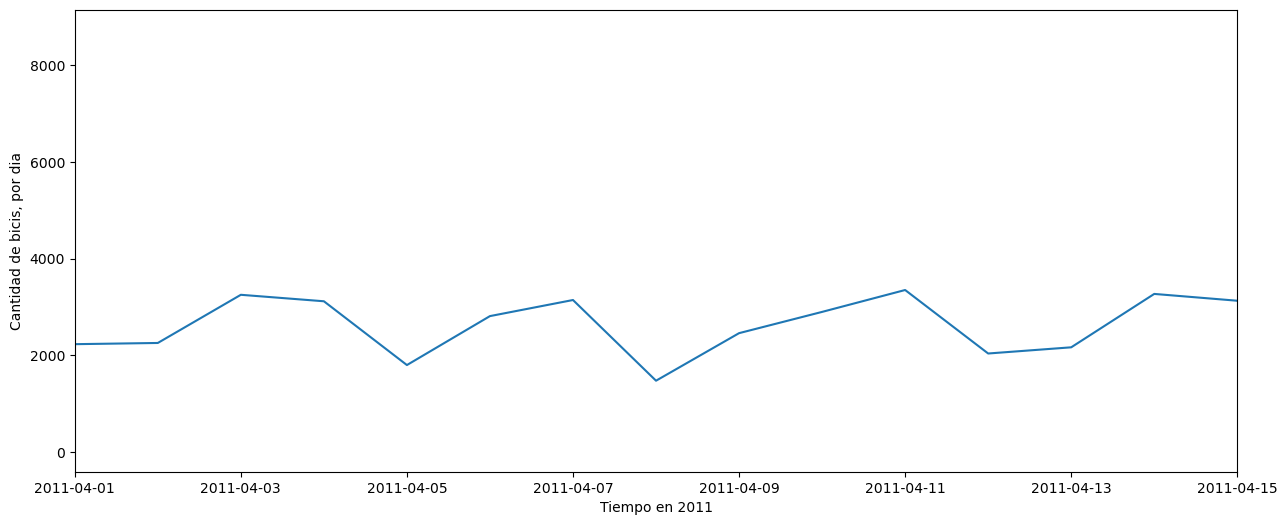

In [69]:
plt.figure(figsize = (15,6))
plt.plot(diario.index, diario.cnt)
plt.xlim(datetime.date(2011,4,1), datetime.date(2011,4,15))
plt.xlabel('Tiempo en 2011')
plt.ylabel('Cantidad de bicis, por dia')
plt.show()

In [ ]:
#analizando una quincena al azar en primavera, estacion donde la temperatura no es tan determinante y no hay tanto turismo,
#(abril 2011) vemos como la curva de bicis alquiladas sigue un patron
#picos en los fines de semana

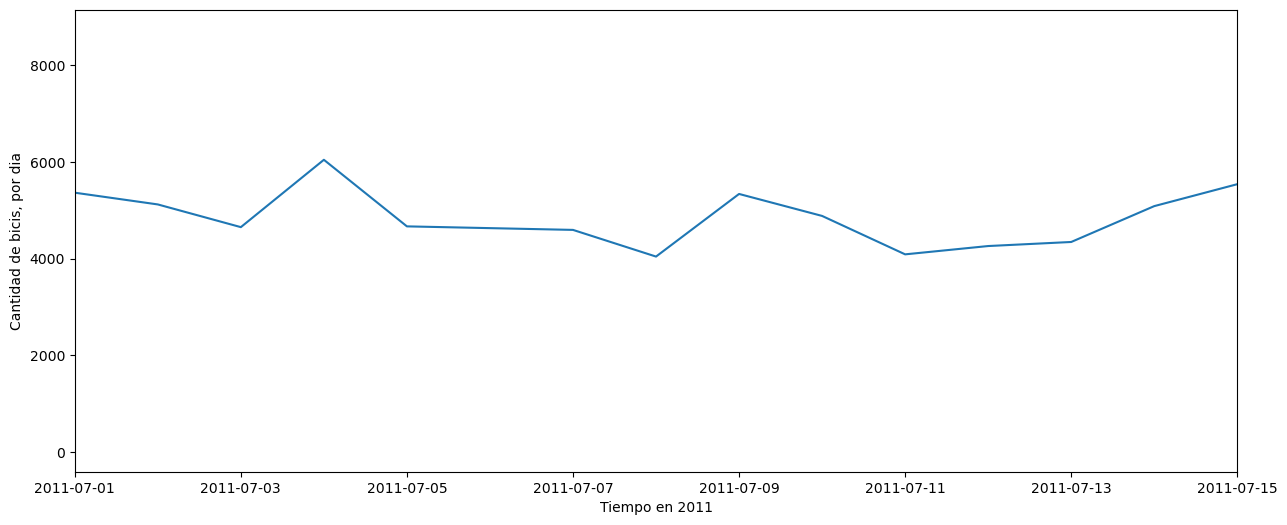

In [71]:
plt.figure(figsize = (15,6))
plt.plot(diario.index, diario.cnt)
plt.xlim(datetime.date(2011,7,1), datetime.date(2011,7,15))
plt.xlabel('Tiempo en 2011')
plt.ylabel('Cantidad de bicis, por dia')
plt.show()

In [ ]:
#sin embargo para verano los picos no son tan marcados, teniendo en cuenta el pico del 4 de julio (fiesta nacional)
#la base en dias entre semana es mucho mas alta lo que nos indica la incidencia de la temperatura y el turismo

In [74]:
from prophet import Prophet

In [77]:
diario

,cnt
fecha,
2011-01-01,985
2011-01-02,801
2011-01-03,1349
2011-01-04,1562
2011-01-05,1600
...,...
2012-12-27,2114
2012-12-28,3095
2012-12-29,1341


In [80]:
df = diario.reset_index()
df.rename(columns = {'fecha':'ds', 'cnt':'y'}, inplace = True)
df

,ds,y
0,2011-01-01,985
1,2011-01-02,801
2,2011-01-03,1349
3,2011-01-04,1562
4,2011-01-05,1600
...,...,...
726,2012-12-27,2114
727,2012-12-28,3095
728,2012-12-29,1341
729,2012-12-30,1796


In [83]:
m = Prophet()
m.fit(df)

20:12:30 - cmdstanpy - INFO - Chain [1] start processing
20:12:30 - cmdstanpy - INFO - Chain [1] done processing


In [86]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
1091,2013-12-27
1092,2013-12-28
1093,2013-12-29
1094,2013-12-30
1095,2013-12-31


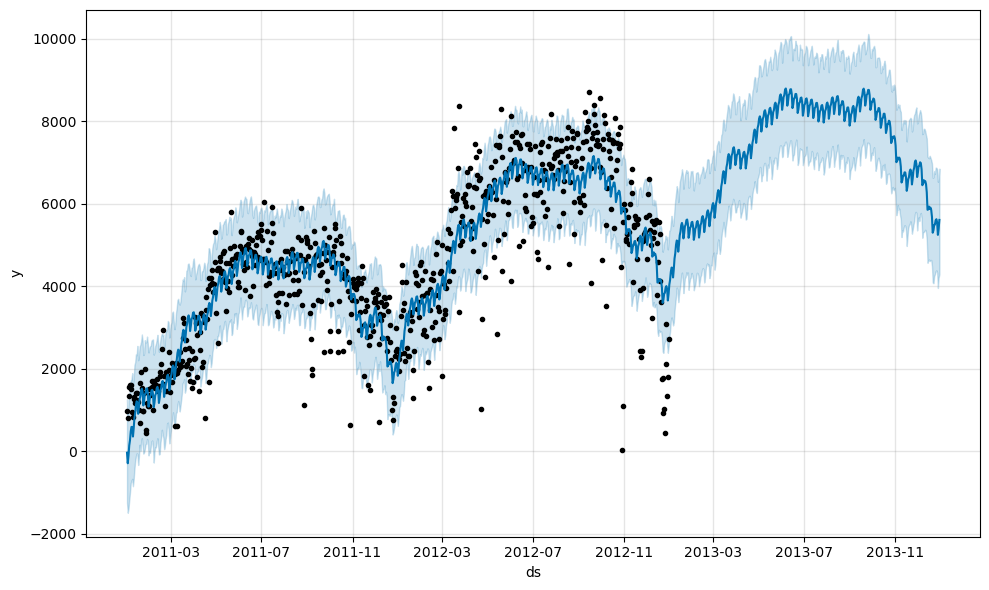

In [89]:
forecast = m.predict(future)
fig1 = m.plot(forecast)

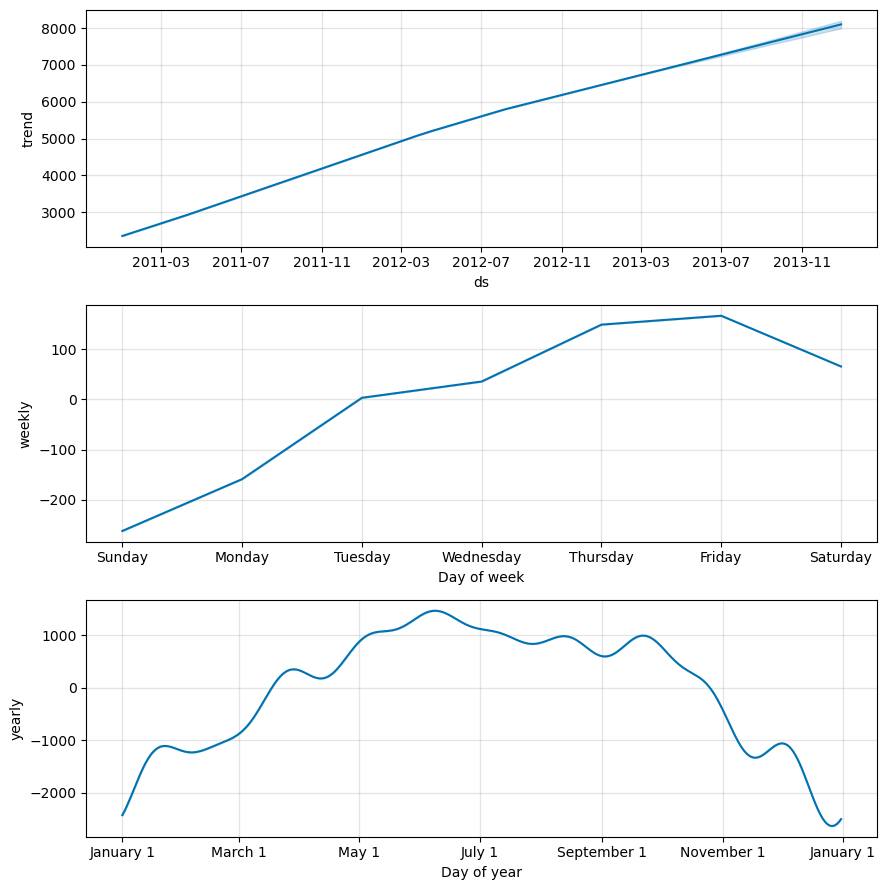

In [92]:
fig2 = m.plot_components(forecast)

In [ ]:
#las conclusiones que sacamos con prophet es primero que la base para 2013 aumentará teniendo en cuenta
#que así lo ha hecho desde 2011 a 2012. A nivel de dias vemos como los más concurridos serán los dias de final de semana
#sorprendentemente vemos que la base de jueves es incluso más alta que la de cualquier dia del fin de semana siendo viernes el dia
#con mayor numero de bicis alquiladas. A nivel meses vemos una tendencia muy clara de aumento en los meses de verano, lo cual nos
#indica que tanto la temperatura como el impacto del turismo pueden ser factores diferenciales.

In [96]:
file.to_csv('filename.csv', index=False)